In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings


In [18]:
data = pd.read_csv('Stock Price Prediction.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [19]:
data.head(13)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [20]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [21]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [28]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
data.duplicated().sum()

0

In [30]:
import seaborn as sns

In [31]:
corr = data.corr()

In [32]:

corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


<Axes: >

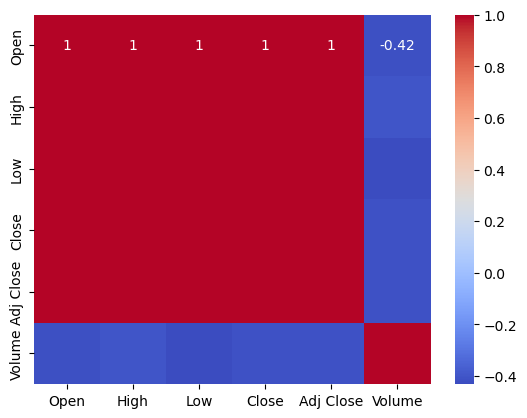

In [34]:
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar=True)

<Axes: xlabel='Open', ylabel='Close'>

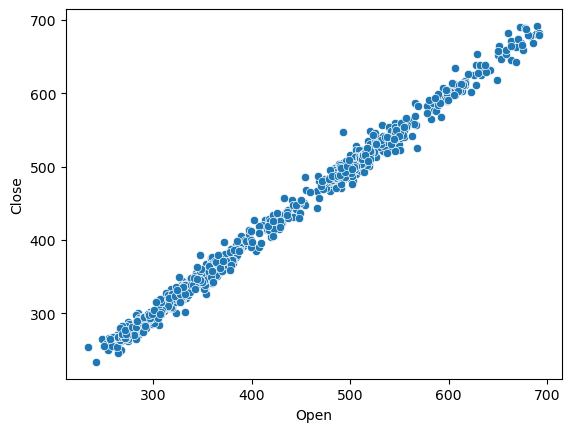

In [35]:
#scatterplots
sns.scatterplot(x=data['Open'],y=data['Close'])

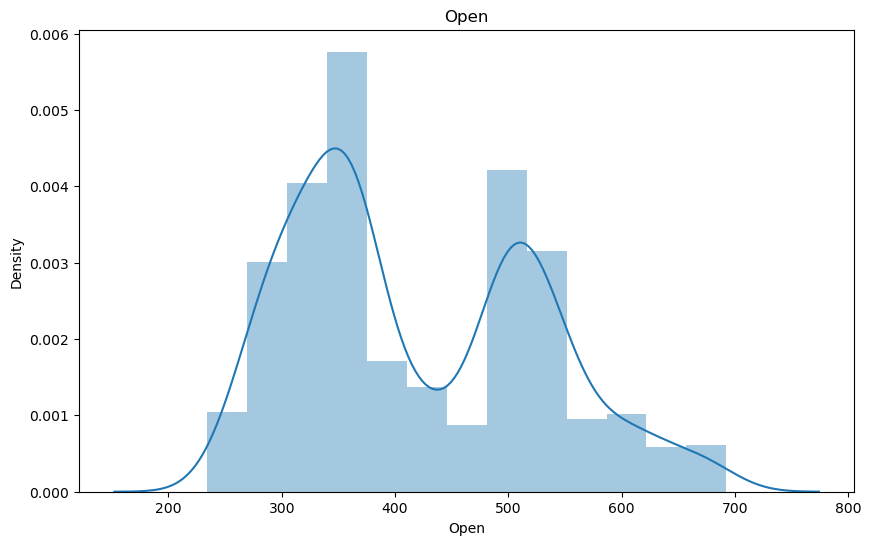

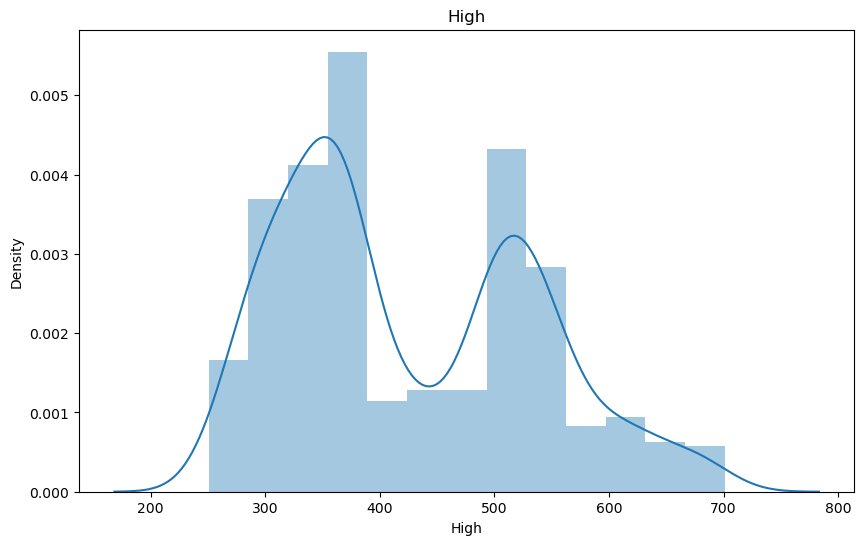

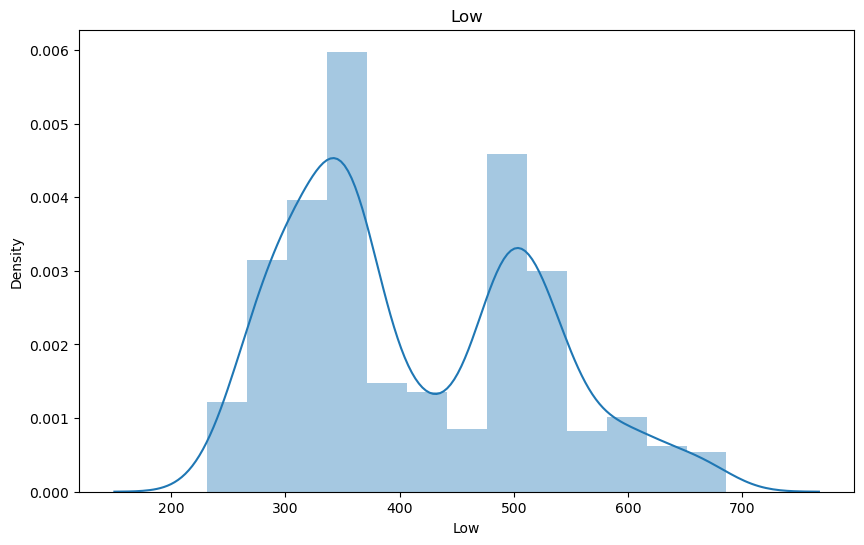

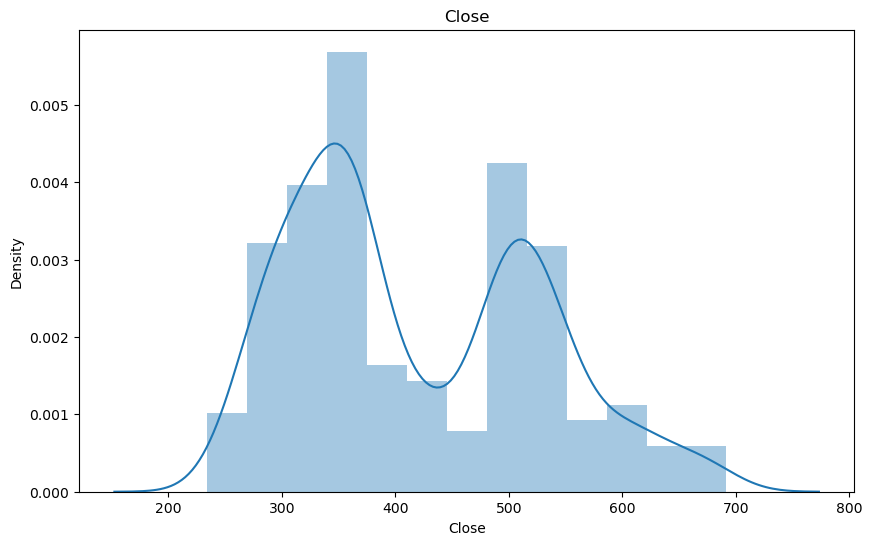

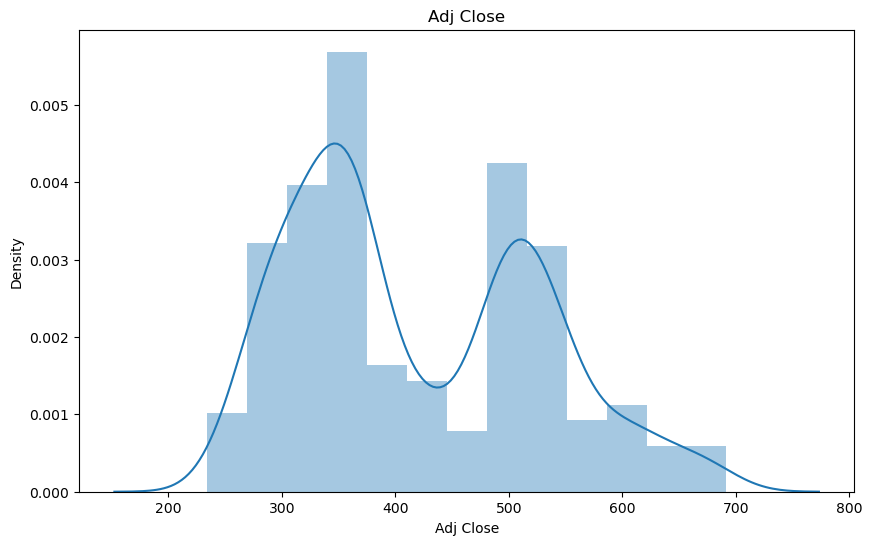

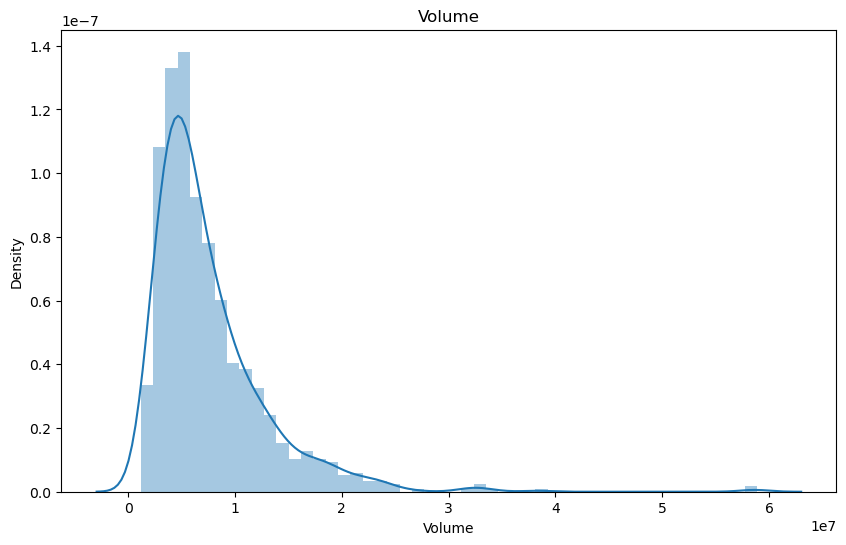

In [36]:
# DATA Destribution
for i in data.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(data[i])
    plt.title(i)
    plt.show()


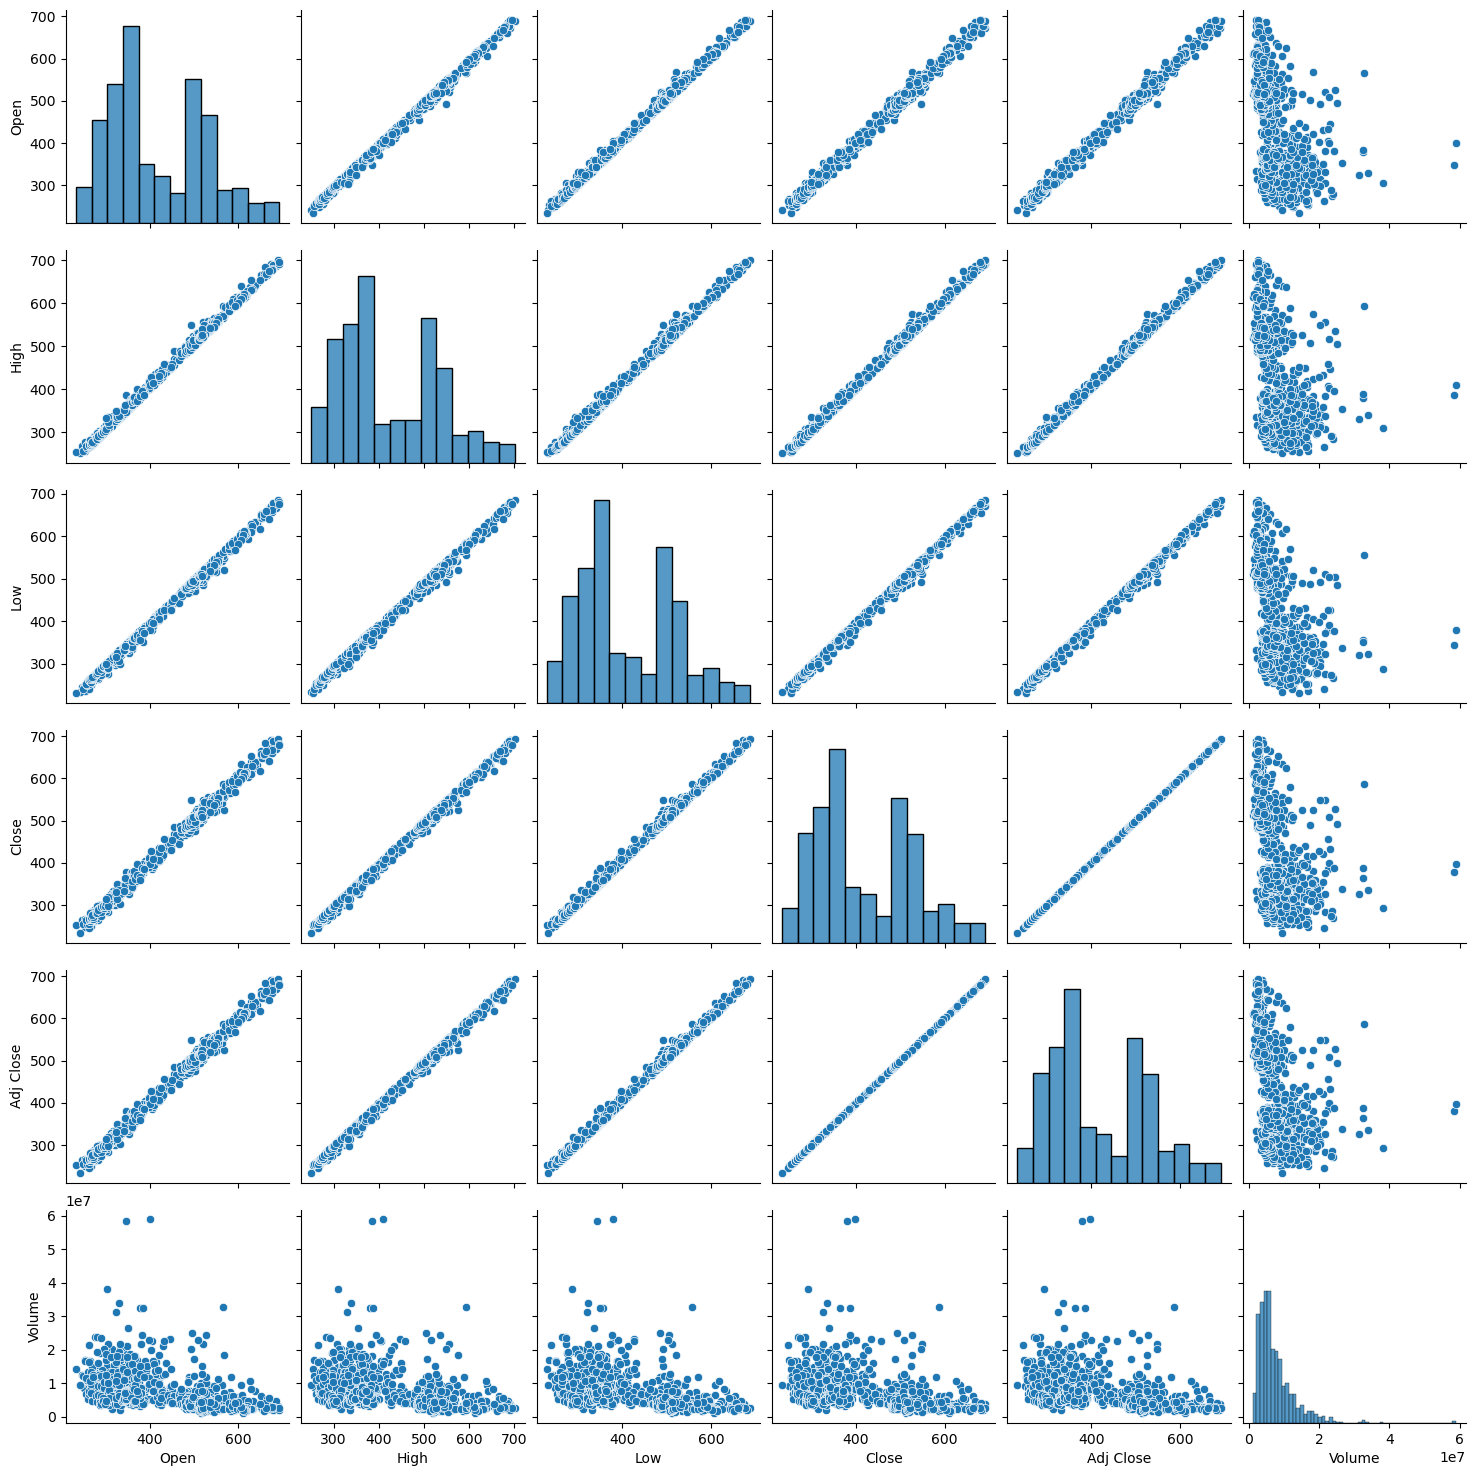

In [37]:
#pairplot
sns.pairplot(data)

In [38]:
# Train Test Split
X = data.drop('Close',axis=1)
y = data['Close']


In [39]:
X.shape

(1009, 5)

In [41]:
y.shape

(1009,)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape

(807, 5)

In [43]:
X_test.shape

(202, 5)

In [44]:
# Normalizating Data Using StandarScaler
X_train

,Open,High,Low,Adj Close,Volume
978,603.359985,614.820007,602.630005,614.239990,2335700
863,540.299988,540.650024,532.919983,537.309998,1780700
658,499.989990,504.660004,483.309998,483.859985,4394900
175,337.630005,339.209991,326.929993,333.130005,11215000
688,486.359985,494.000000,483.279999,486.239990,5992700
...,...,...,...,...,...
534,342.309998,350.489990,332.000000,332.829987,10853800
584,425.869995,427.589996,419.459991,427.309998,3494800
493,332.549988,336.299988,323.600006,326.000000,21730000
527,358.920013,362.980011,344.790009,349.920013,6036000


In [45]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_train = sclr.fit_transform(X_train)
X_test = sclr.transform(X_test)
X_train

array([[ 1.72652116,  1.7630812 ,  1.79966307,  1.83228717, -0.9343211 ],
       [ 1.13749065,  1.07483945,  1.14205111,  1.11165101, -1.03201633],
       [ 0.76096323,  0.74087909,  0.67405356,  0.61096186, -0.5718454 ],
       ...,
       [-0.80305951, -0.82137543, -0.83257631, -0.86778019,  2.47960785],
       [-0.55674251, -0.57380485, -0.63267967, -0.64371119, -0.28296677],
       [-0.3983227 , -0.45373135, -0.48542232, -0.51509658,  0.251875  ]])

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([325.220001, 668.400024, 682.609985, 639.      , 520.799988,
       353.399994, 531.049988, 266.690002, 352.600006, 504.579987,
       507.019989, 588.549988, 482.880005, 517.349976, 286.730011,
       550.789978, 489.049988, 292.859985, 544.530029, 385.029999,
       295.350006, 294.179993, 271.269989, 488.929993, 482.350006,
       319.5     , 617.77002 , 687.400024, 503.859985, 364.579987,
       678.799988, 513.390015, 482.839996, 307.630005, 540.679993,
       436.529999, 486.769989, 482.880005, 289.290009, 439.170013,
       336.299988, 332.670013, 603.349976, 577.76001 , 325.220001,
       327.5     , 426.75    , 424.98999 , 391.429993, 293.119995,
       328.529999, 342.880005, 369.01001 , 518.909973, 466.929993,
       365.359985, 386.      , 365.209991, 281.209991, 290.609985,
       351.339996, 326.459991, 301.829987, 284.25    , 519.200012,
       639.099976, 533.030029, 345.26001 , 688.289978, 523.280029,
       526.27002 , 306.160004, 637.969971, 502.410004, 268.029

In [56]:
from sklearn.metrics import r2_score,mean_squared_error                         # Evaluation
r2_score(y_test,y_pred)

1.0

In [57]:
mean_squared_error(y_test,y_pred)

4.386878925446083e-27

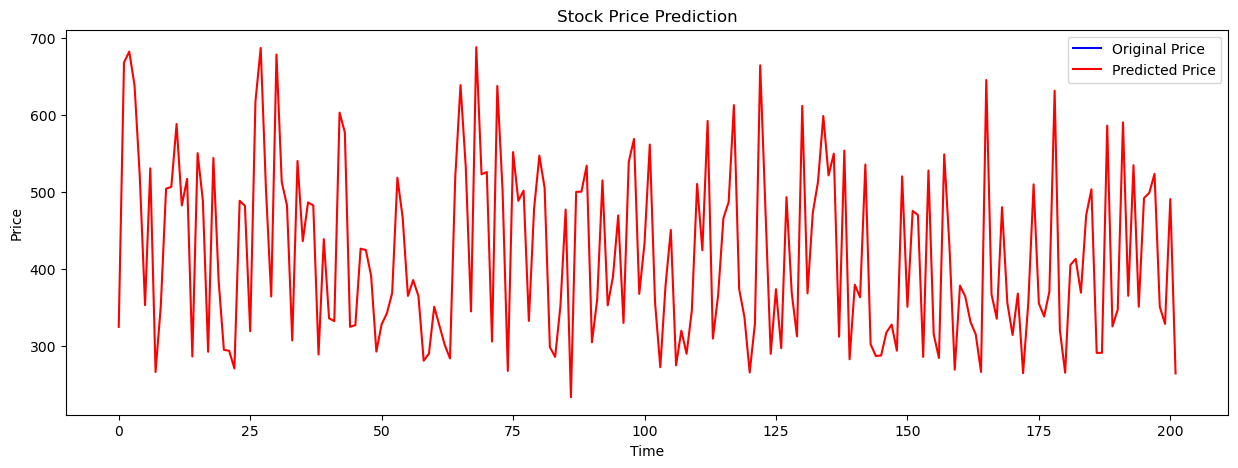

In [76]:
# Plotting graph for the result
plt.figure(figsize = (15,5))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_pred,'r',label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
